In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
# read the data
df = pd.read_csv('Master_Cohort_w_Medications.csv')

1. Basic Data Overview

In [4]:
print("Dataset Overview:")
print(f"Total number of patients: {len(df)}")
print("\nColumns in the dataset:")
print(df.columns.tolist())

Dataset Overview:
Total number of patients: 10000

Columns in the dataset:
['Patient ID', 'Index Date', 'Date of Birth', 'Age', 'Gender', 'Race', 'Nationality', 'Death Reason', 'Patient Status', 'Index Smoking Habit', 'Index BMI', 'WAAP Done Status', 'Health/Asthma Counselling Status', 'WAAP Done Counts', 'Health/Asthma Counselling Counts', 'Adrenal Insufficiency', 'Allergic Rhinitis', 'Anxiety', 'Atopic Dermatitis', 'Bronchiectasis', 'COPD', 'Cataract', 'Cerebrovascular Accident', 'Chronic Kidney Disease', 'Chronic Rhinosinusitis', 'Chronic Rhinosinusitis with Nasal Polyps', 'Depression', 'Diabetes', 'GERD', 'Glaucoma', 'Heart Failure', 'Hyperlipidemia and/or Dyslipidemia', 'Hypertension', 'Ischemic Heart Disease', 'Obesity', 'Obstructive Sleep Apnoea', 'Osteoporosis', 'Peptic Ulcer Disease', 'Pneumonia', 'Vocal Cord Dysfunction', 'Baseline FEV1 Post', 'Baseline FEV1 Pre', 'Baseline FEV1 Pre %', 'Baseline FEV1 Post %', 'Baseline FVC Pre', 'Baseline FVC Post', 'Baseline FEV1/FVC Pre', 

2. Patient Demographics Analysis

In [5]:
print("\nDemographic Summary:")
print("\nGender Distribution:")
print(df['Gender'].value_counts(normalize=True) * 100)

print("\nRace Distribution:")
print(df['Race'].value_counts(normalize=True) * 100)

print("\nAge Statistics:")
print(df['Age'].describe())


Demographic Summary:

Gender Distribution:
Gender
Female    50.06
Male      49.94
Name: proportion, dtype: float64

Race Distribution:
Race
Asian    25.36
Black    24.98
White    24.84
Other    24.82
Name: proportion, dtype: float64

Age Statistics:
count    10000.000000
mean        50.399900
std         29.278851
min          0.000000
25%         25.000000
50%         50.000000
75%         76.000000
max        100.000000
Name: Age, dtype: float64


c:\ProgramData\anaconda3\envs\mlaenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\mlaenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


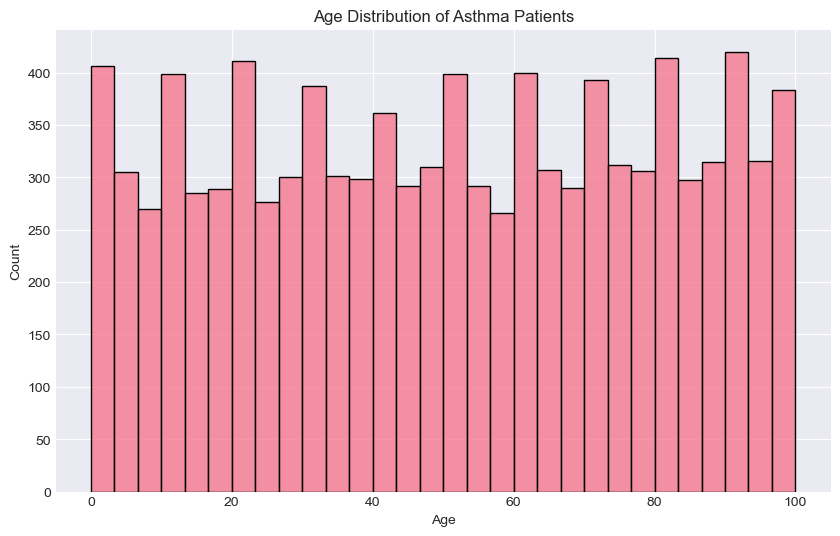

In [6]:
# visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution of Asthma Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

BMI has a meaning.

3. Exacerbation Analysis

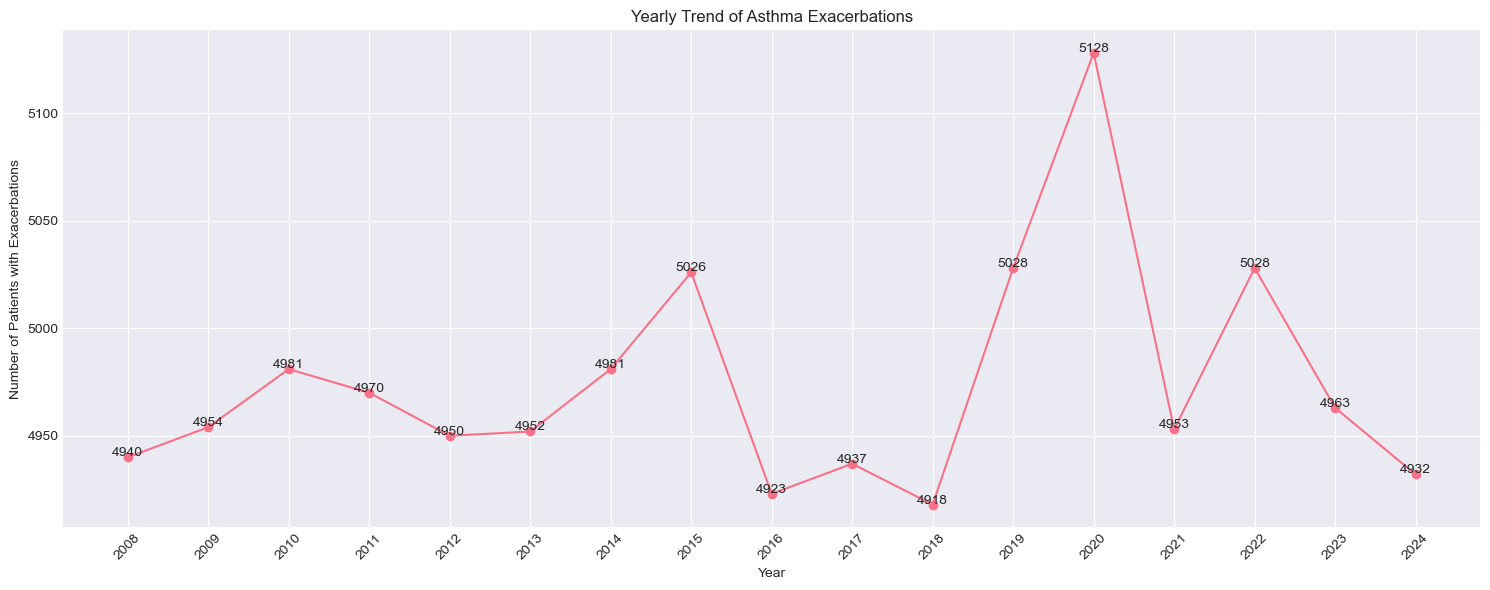


Percentage of Patients with Exacerbations:
2008    49.4
2009    49.5
2010    49.8
2011    49.7
2012    49.5
2013    49.5
2014    49.8
2015    50.3
2016    49.2
2017    49.4
2018    49.2
2019    50.3
2020    51.3
2021    49.5
2022    50.3
2023    49.6
2024    49.3
dtype: float64


In [7]:
# extract exacerbation columns
exacerbation_cols = [col for col in df.columns if 'Exacerbation Counts' in col]

# convert Yes/No to 1/0
for col in exacerbation_cols:
    df[col] = (df[col] == 'Yes').astype(int)

# calculate yearly sums
yearly_exacerbations = df[exacerbation_cols].sum()
years = [int(col.split()[-1]) for col in exacerbation_cols]
yearly_exacerbations.index = years
yearly_exacerbations = yearly_exacerbations.sort_index()

# plot yearly exacerbations
plt.figure(figsize=(15, 6))
plt.plot(yearly_exacerbations.index, yearly_exacerbations.values, marker='o')
plt.title('Yearly Trend of Asthma Exacerbations')
plt.xlabel('Year')
plt.ylabel('Number of Patients with Exacerbations')
plt.grid(True)
plt.xticks(years, rotation=45)

# add value labels
for x, y in zip(yearly_exacerbations.index, yearly_exacerbations.values):
    plt.text(x, y + 0.5, str(y), ha='center')

plt.tight_layout()
plt.show()

# calculate percentage of patients with exacerbations
total_patients = len(df)
yearly_percentages = (yearly_exacerbations / total_patients * 100).round(1)
print("\nPercentage of Patients with Exacerbations:")
print(yearly_percentages)

4. Treatment Analysis


GINA Step Distribution:
Final GINA STEP
No     50.57
Yes    49.43
Name: proportion, dtype: float64

Medication Usage:

Final Montelukast Flag:
Final Montelukast Flag
Yes    50.5
No     49.5
Name: proportion, dtype: float64

Final ICS Level:
Final ICS Level
Yes    50.13
No     49.87
Name: proportion, dtype: float64

Final LABA Flag:
Final LABA Flag
No     50.06
Yes    49.94
Name: proportion, dtype: float64

LAMA:
LAMA
No     50.22
Yes    49.78
Name: proportion, dtype: float64

SAMA:
SAMA
No     50.67
Yes    49.33
Name: proportion, dtype: float64

Systemic Steroid Burst:
Systemic Steroid Burst
No     50.08
Yes    49.92
Name: proportion, dtype: float64

Oral Prednisolone:
Oral Prednisolone
No     50.31
Yes    49.69
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

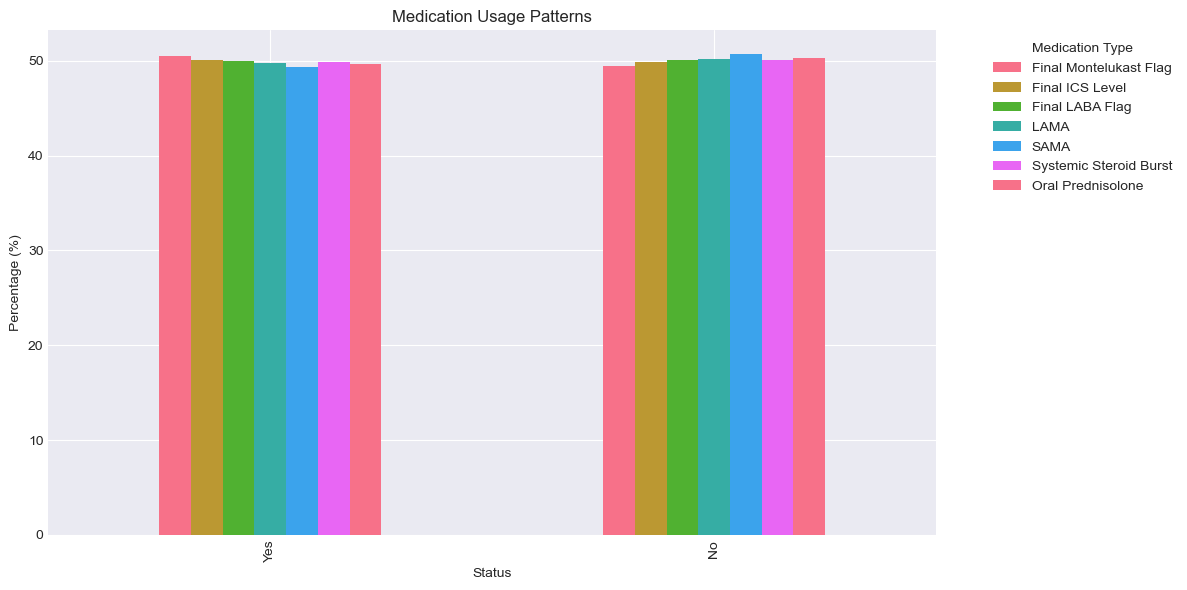

In [8]:
# analyze GINA steps
print("\nGINA Step Distribution:")
print(df['Final GINA STEP'].value_counts(normalize=True) * 100)

# medication analysis
medication_cols = ['Final Montelukast Flag', 'Final ICS Level', 'Final LABA Flag', 
                  'LAMA', 'SAMA', 'Systemic Steroid Burst', 'Oral Prednisolone']

print("\nMedication Usage:")
for med in medication_cols:
    print(f"\n{med}:")
    print(df[med].value_counts(normalize=True) * 100)

# visualize medication usage
med_usage = pd.DataFrame()
for med in medication_cols:
    med_usage[med] = df[med].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
med_usage.plot(kind='bar')
plt.title('Medication Usage Patterns')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.legend(title='Medication Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

5. Comorbidity Analysis

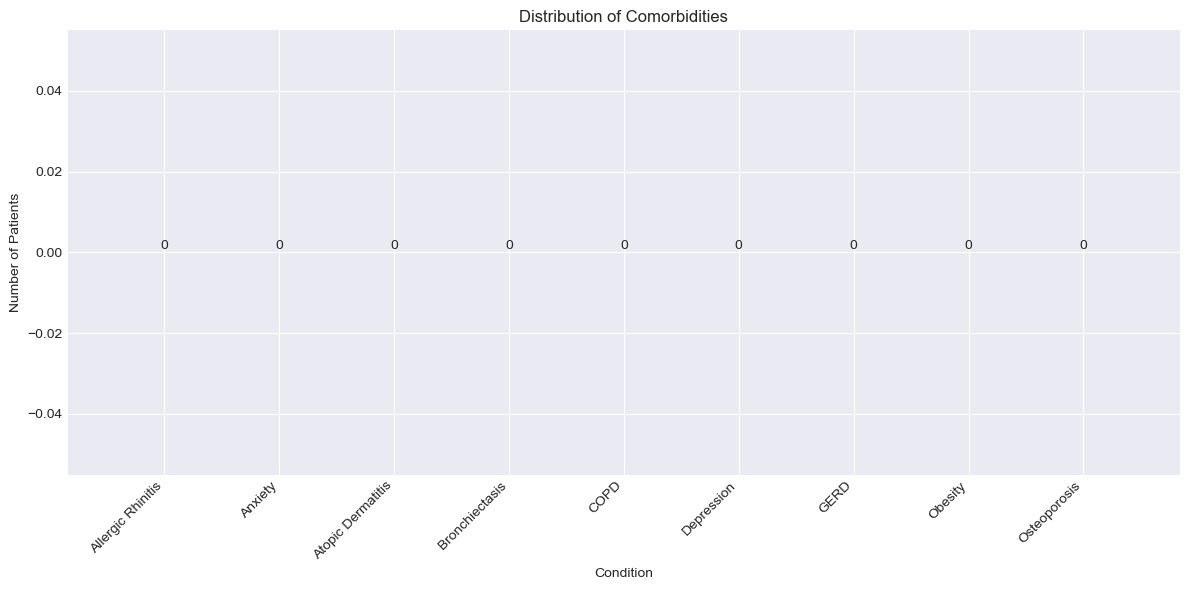


Comorbidity Statistics:
        Condition  Count  Percentage
Allergic Rhinitis      0         0.0
          Anxiety      0         0.0
Atopic Dermatitis      0         0.0
   Bronchiectasis      0         0.0
             COPD      0         0.0
       Depression      0         0.0
             GERD      0         0.0
          Obesity      0         0.0
     Osteoporosis      0         0.0


In [10]:
# 5. Comorbidity Analysis
#-----------------------
# define comorbidity columns
comorbidity_cols = ['Allergic Rhinitis', 'Anxiety', 'Atopic Dermatitis', 'Bronchiectasis',
                   'COPD', 'Depression', 'GERD', 'Obesity', 'Osteoporosis']

# initialize empty list to store results
comorbidity_data = []

# calculate counts and percentages
for condition in comorbidity_cols:
    count = (df[condition] == 'Y').sum()  # Using 'Y' instead of 'Yes'
    percentage = (count / len(df)) * 100
    comorbidity_data.append({
        'Condition': condition,
        'Count': count,
        'Percentage': percentage
    })

# convert to DataFrame
comorbidity_df = pd.DataFrame(comorbidity_data)

# sort by count in descending order
comorbidity_df = comorbidity_df.sort_values('Count', ascending=False)

# create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(comorbidity_df['Condition'], comorbidity_df['Count'])
plt.title('Distribution of Comorbidities')
plt.xlabel('Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')

# add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# print detailed statistics
print("\nComorbidity Statistics:")
print(comorbidity_df.to_string(index=False))

6. Lung Function Analysis


Lung Function Statistics:
       Baseline FEV1 Pre %  Baseline FEV1 Post %  Follow Up FEV1 Pre %  \
count                  0.0                   0.0                   0.0   
mean                   NaN                   NaN                   NaN   
std                    NaN                   NaN                   NaN   
min                    NaN                   NaN                   NaN   
25%                    NaN                   NaN                   NaN   
50%                    NaN                   NaN                   NaN   
75%                    NaN                   NaN                   NaN   
max                    NaN                   NaN                   NaN   

       Follow Up FEV1 Post %  
count                    0.0  
mean                     NaN  
std                      NaN  
min                      NaN  
25%                      NaN  
50%                      NaN  
75%                      NaN  
max                      NaN  


c:\ProgramData\anaconda3\envs\mlaenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


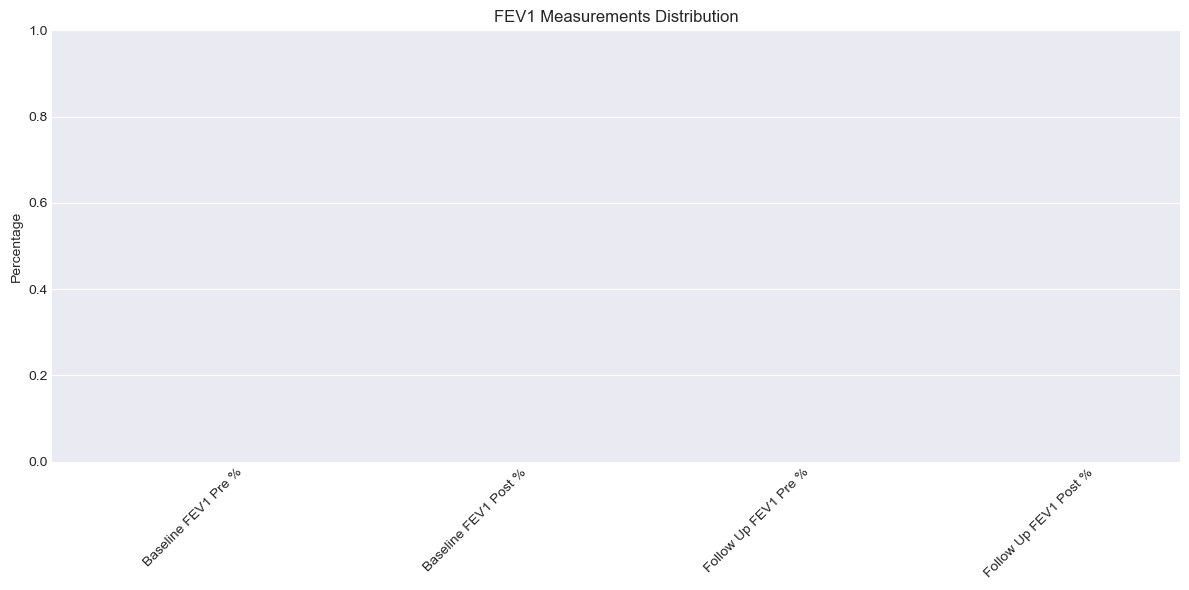

In [11]:
lung_function_cols = ['Baseline FEV1 Pre %', 'Baseline FEV1 Post %', 
                     'Follow Up FEV1 Pre %', 'Follow Up FEV1 Post %']

# convert to numeric, handling any non-numeric values
for col in lung_function_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nLung Function Statistics:")
print(df[lung_function_cols].describe())

# visualize FEV1 distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[lung_function_cols])
plt.title('FEV1 Measurements Distribution')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

7. Healthcare Utilization Analysis


Healthcare Utilization Statistics:
       Asthma Visits  Non Asthma Visits  Total Visits  \
count            0.0                0.0           0.0   
mean             NaN                NaN           NaN   
std              NaN                NaN           NaN   
min              NaN                NaN           NaN   
25%              NaN                NaN           NaN   
50%              NaN                NaN           NaN   
75%              NaN                NaN           NaN   
max              NaN                NaN           NaN   

       Average Asthma Visits/Year  Average Non-Asthma Visits/Year  
count                         0.0                             0.0  
mean                          NaN                             NaN  
std                           NaN                             NaN  
min                           NaN                             NaN  
25%                           NaN                             NaN  
50%                           NaN         

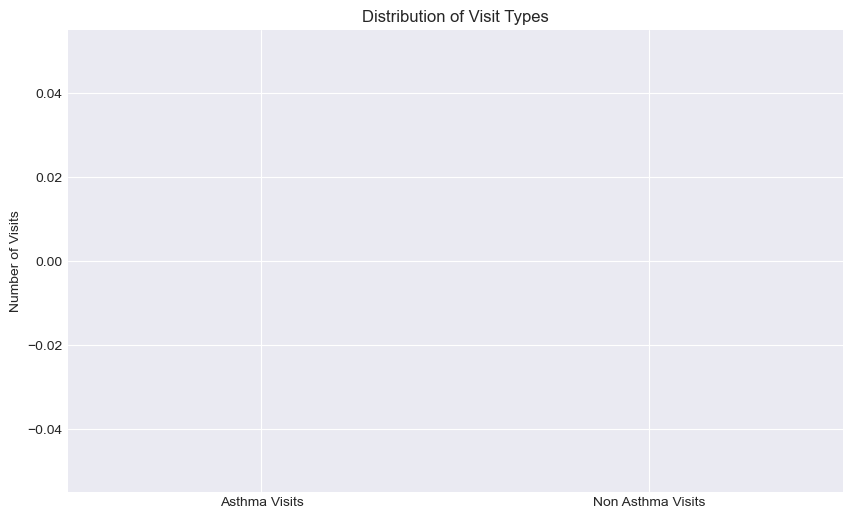

In [12]:
utilization_cols = ['Asthma Visits', 'Non Asthma Visits', 'Total Visits',
                   'Average Asthma Visits/Year', 'Average Non-Asthma Visits/Year']

# convert to numeric
for col in utilization_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nHealthcare Utilization Statistics:")
print(df[utilization_cols].describe())

# visualize visit patterns
plt.figure(figsize=(10, 6))
df[['Asthma Visits', 'Non Asthma Visits']].boxplot()
plt.title('Distribution of Visit Types')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()

8. Vaccination Status


Vaccination Status:

Influenza Vac History:
Influenza Vac History
No     50.82
Yes    49.18
Name: proportion, dtype: float64

Pneumococcal PCV13 History:
Pneumococcal PCV13 History
No     50.58
Yes    49.42
Name: proportion, dtype: float64

Pneumococcal PPSV23 History:
Pneumococcal PPSV23 History
No     51.37
Yes    48.63
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

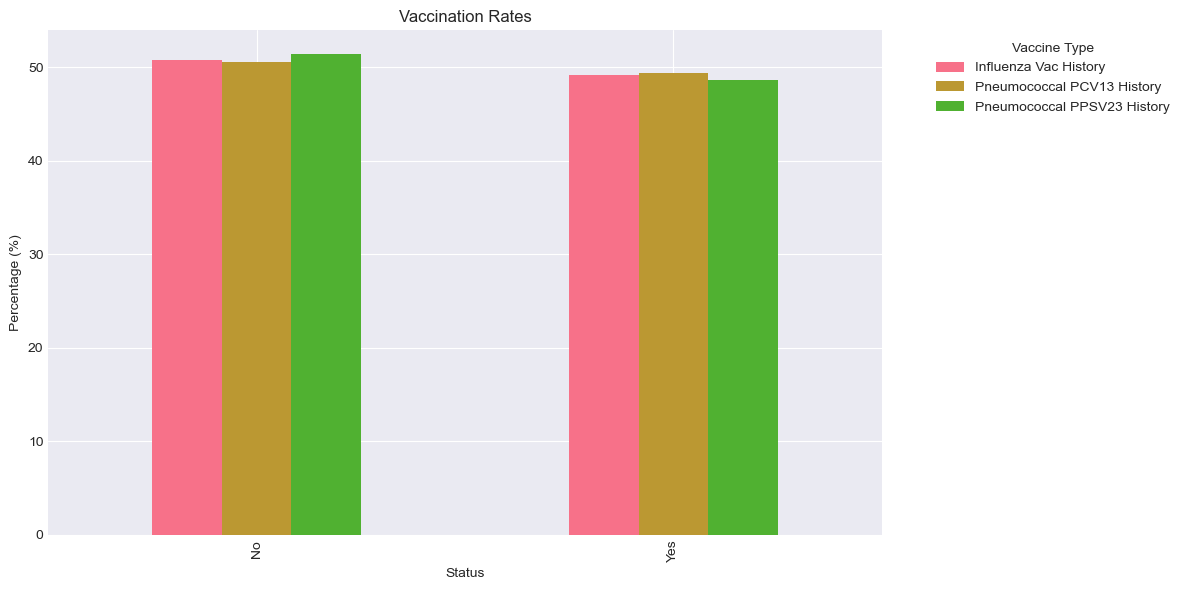

In [13]:
vaccination_cols = ['Influenza Vac History', 'Pneumococcal PCV13 History', 'Pneumococcal PPSV23 History']

print("\nVaccination Status:")
for vac in vaccination_cols:
    print(f"\n{vac}:")
    print(df[vac].value_counts(normalize=True) * 100)

# visualize vaccination rates
vac_data = pd.DataFrame()
for vac in vaccination_cols:
    vac_data[vac] = df[vac].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
vac_data.plot(kind='bar')
plt.title('Vaccination Rates')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
plt.legend(title='Vaccine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

9. Correlation Analysis

c:\ProgramData\anaconda3\envs\mlaenv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


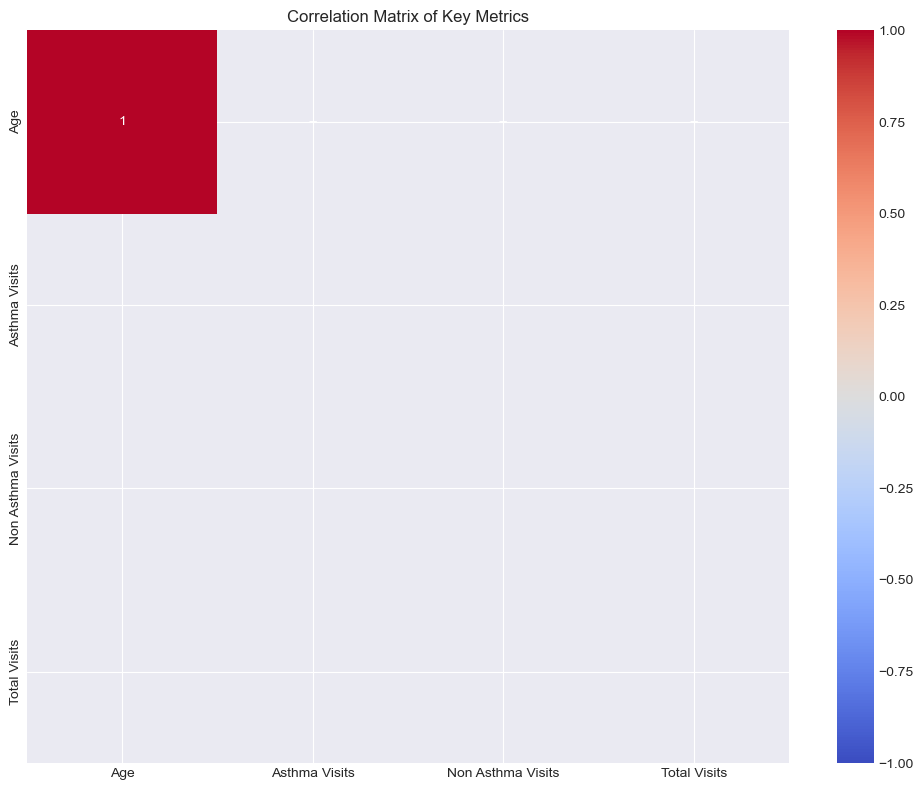

In [14]:
# select numeric columns for correlation
numeric_cols = ['Age', 'Asthma Visits', 'Non Asthma Visits', 'Total Visits']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Metrics')
plt.tight_layout()
plt.show()